# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

1. **Частота дискретизации.**

    $$ f_d = \frac{1}{T} $$
2. **Единичный цифровой импульс.**

    $$
    \delta_d(n)=\begin{cases}
    1, & n=0,\\
    0, & n\neq 0.
    \end{cases}
    $$

3. **Дельта-функция (функция Дирака).**

    $$
    \delta(t) =
    \begin{cases}
    \infty, & t = 0, \\
    0, & t \neq 0.
    \end{cases}
    $$

4. **Дискретный единичный скачок.**
        $$
        \sigma_d(n)=\begin{cases}
        1, & n\ge 0,\\
        0, & n<0.
        \end{cases}
        $$

5. **Функция единичного скачка (функция Хевисайда).**
    $$
    \sigma(t) =
    \begin{cases}
    1, & t > 0, \\
    0.5 \ или \ не \ определена, & t = 0, \\
    0, & t < 0.
    \end{cases} $$

6. **Дискретная экспоненциальная функция.**
    $$
    s_1(k) =
    \begin{cases}
    0, & k < 0, \\
    a^k, & k \geq 0,
    \end{cases}
    \quad k \in \mathbb{Z}
   $$
7. **Дискретный комплексный гармонический сигнал.**

$$ s_2(k) = C \exp\!\big(j \omega_0 k \big) $$



## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Nb = 14  # Номер варианта
N = 30 + Nb % 5  # Длина последовательности
T = 5e-4 * (1 + Nb % 3)  # Период дискретизации
a = .8 + 5e-3 * (Nb % 20)  # Основание экспоненты
C = 1 + Nb % 5  # Амплитуда гармонического сигнала
w0 = np.pi / (6 + Nb % 5)  # Частота гармонического сигнала
m = 5 + Nb % 5  # Задержка

In [4]:
n = np.arange(N)  # Отсчеты
nT = n * T  # Временные метки отсчетов

1. Смоделировать единичный цифровой импульс $ \delta_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $.  
- Пояснить взаимосвязь между дискретным и дискретным нормированным временем;  
- Пояснить различие между единичным цифровым импульсом и дельта-функцией.

**Дискретное время** $ nT $ и **дискретное нормированное время** $ n $ связаны соотношением: $ nT = n \cdot T $, где $ T $ - период дискретизации, а $ n $ - номер отсчета. 

То есть дискретное нормированное время является безразмерным числом, которое указывает на количество периодов дискретизации, прошедших с начала отсчета.

**Единичный цифровой импульс** $ \delta_d(k) $ - это **дискретный** сигнал, который принимает значение 1 в момент времени $ k = 0 $ и значение 0 во все остальные моменты времени.
В свою очередь, **дельта-функция** $ \delta(t) $ - это идеализированный сигнал, который имеет бесконечно малую длительность и бесконечно большую амплитуду в момент времени $ t = 0 $. 

Таким образом, основное различие между **единичным цифровым импульсом** и **дельта-функцией** заключается в том, что первый является дискретным сигналом с конечной амплитудой, а второй - идеализированным сигналом с бесконечной амплитудой и бесконечно малой длительностью.

In [5]:
def delta_digital(n: np.ndarray):
    return np.where(n == 0, 1, 0)

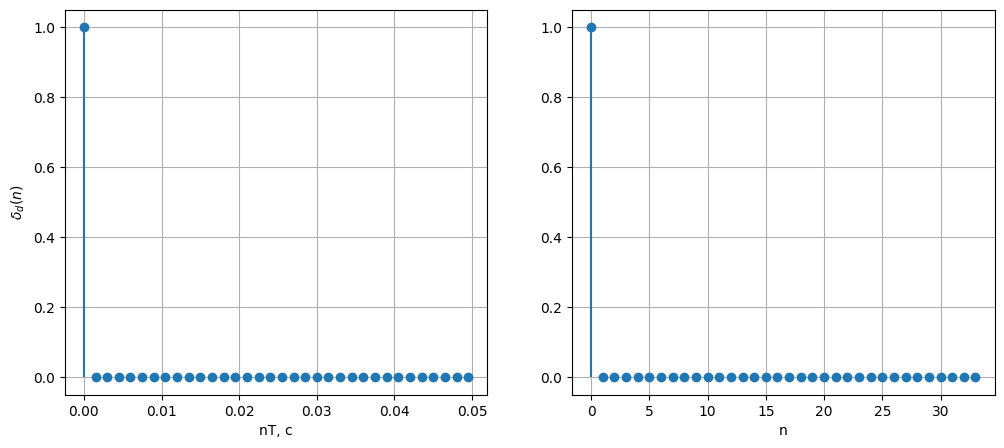

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.stem(nT, delta_digital(n), basefmt=" ")
plt.xlabel('nT, c')
plt.ylabel(r'$\delta_d(n)$')
plt.grid()

plt.subplot(122)
plt.stem(n, delta_digital(n), basefmt=" ")
plt.grid()
plt.xlabel('n')

plt.show()

2. Смоделировать дискретный единичный скачок $ \sigma_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $.  
- Пояснить соответствие между дискретным и аналоговым единичными скачками;  
- Определить, чему равна частота дискретизации дискретного единичного скачка.

Дискретный единичный скачок $ \sigma(t) $ - это сигнал, который принимает значение 0 для всех отрицательных значений времени ($ t < 0 $) и значение 1 для всех неотрицательных значений времени ($ t \geq 0 $). 
Аналоговый единичный скачок $ \delta_1(t) $ - это сигнал, который принимает значение 0 для всех отрицательных значений времени ($ t < 0 $) и значение 1 для всех неотрицательных значений времени ($ t \geq 0 $).

Они соответствуют друг другу в том смысле, что дискретный единичный скачок можно рассматривать как дискретизацию аналогового единичного скачка при определенной частоте дискретизации. 

In [7]:
print(T, 1/T) # 😈😈😈

0.0015 666.6666666666666


Частота дискретизации дискретного единичного скачка определяется как обратная величина периода дискретизации $ T $, то есть $ f_d = \frac{1}{T} $.

В нашем случае, при $ T = 0.0015 $ с, частота дискретизации будет равна: $ f_d = \frac{1}{0.0015} \approx 666.67 $ Гц. 😈😈😈

In [8]:
def sigma_digital(n: np.ndarray):
    return np.where(n >= 0, 1, 0)

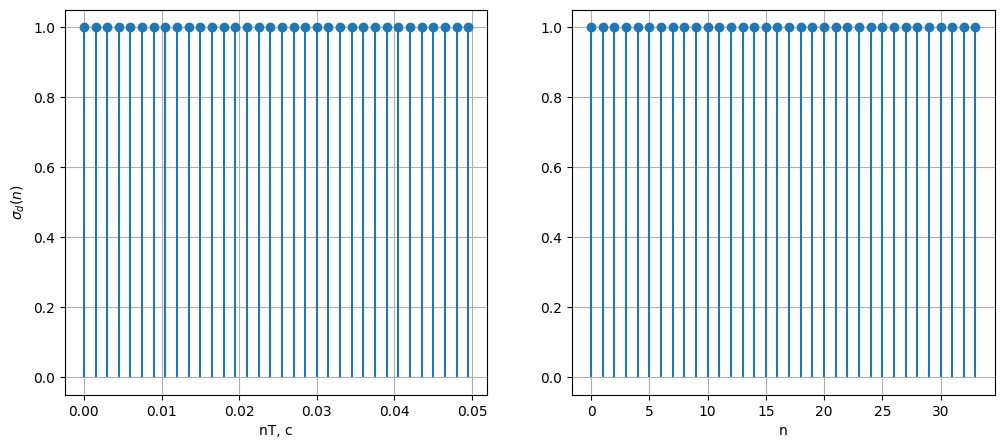

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.stem(nT, sigma_digital(n), basefmt=" ")
plt.xlabel('nT, c')
plt.ylabel(r'$\sigma_d(n)$')
plt.grid()

plt.subplot(122)
plt.stem(n, sigma_digital(n), basefmt=" ")
plt.grid()
plt.xlabel('n')

plt.show()

Поскольку все отсчеты $\ge 0$, то значение функции равно $1$.

3. Смоделировать дискретную экспоненциальную функцию $ s_1(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.

Поскольку $s_1(k) = a^k$ при $k \ge 0$ и $s_1(k) = 0$ при $k < 0$, то ее можно представить как $s_1(k) = a^k \cdot \sigma_d(k)$.

Дискретная и аналоговая экспоненты соответствуют друг другу в том смысле, что дискретная экспонента может быть получена путем дискретизации аналоговой экспоненты при определенной частоте дискретизации.

In [10]:
def s1(n: np.ndarray):
    return a ** n * sigma_digital(n)

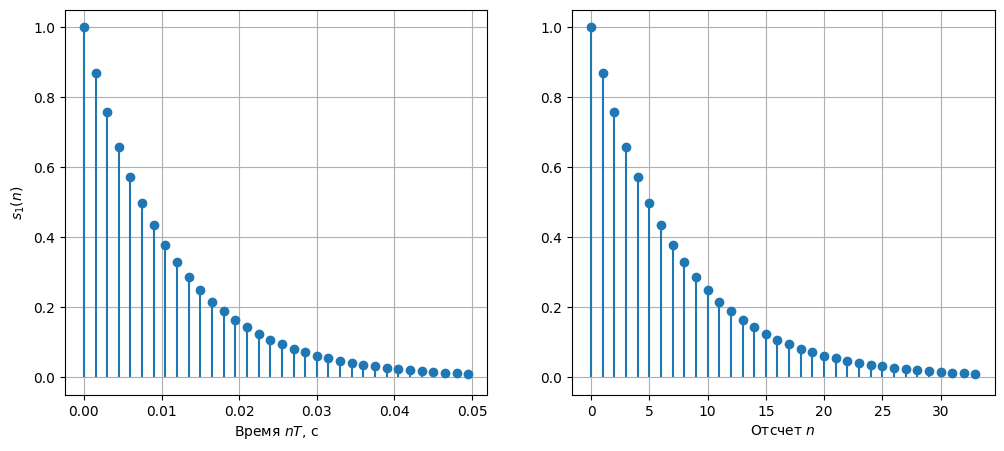

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.stem(nT, s1(n), basefmt=" ")
plt.xlabel("Время $nT$, с")
plt.ylabel("$s_1(n)$")
plt.grid()

plt.subplot(122)
plt.stem(n, s1(n), basefmt=" ")
plt.xlabel("Отсчет $n$")
plt.grid()
plt.show()

4. Смоделировать дискретный комплексный гармонический сигнал $ s_2(k) = C \exp(j \omega_0 k) $ с выводом графиков вещественной и мнимой частей на интервале времени $ n \in [0, N-1] $. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

Сигнал $ s_2(k) = C \exp(j \omega_0 k) $ можно записать в виде комбинации двух вещественных последовательностей, используя формулу Эйлера:
$$ s_2(k) = C \cos(\omega_0 k) + j C \sin(\omega_0 k) $$

In [12]:
def s_2_real(n: np.ndarray):
    return C * np.cos(w0 * n)

def s_2_imag(n: np.ndarray):
    return C * np.sin(w0 * n)

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.stem(n, s_2_real(n), basefmt=" ")
plt.xlabel("Отсчет $n$")
plt.ylabel(r"$\text{Re}(s_{2}(n))$")
plt.grid()

plt.subplot(122)
plt.stem(n, s_2_imag(n), basefmt=" ")
plt.xlabel("Отсчет $n$")
plt.ylabel(r"$\text{Im}(s_{2}(n))$")
plt.grid()
plt.show()

Сигнал в виде комбинации двух вещественных последовательностей:
$$ s_2(k) = C \cos(\omega_0 k) + j C \sin(\omega_0 k) = 5 \cos(0.3142 k) + j 5 \sin(0.3142 k)$$


5. Вывести графики последовательностей $ \delta_d(k) $, $ \sigma_d(k) $ и $ s_1(k) $, задержанных на $ m $ отсчетов, на интервале времени $ n \in [0, N-1] $. Записать формулы задержанных последовательностей.

Задержанные последовательности можно записать следующим образом:
- Задержанный единичный цифровой импульс: $ \delta_d(k - m) $
- Задержанный дискретный единичный скачок: $ \sigma_d(k - m) $
- Задержанная дискретная экспоненциальная функция: $ s_1(k - m) = a^{(k - m)} \cdot \sigma_d(k - m) $

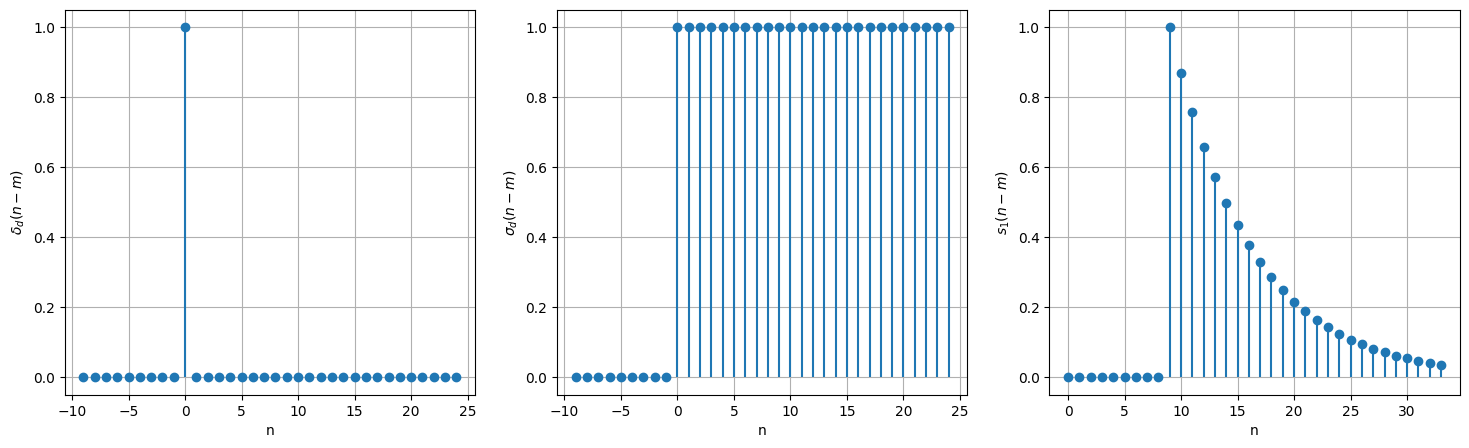

In [22]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.stem(n - m, delta_digital(n - m), basefmt=" ")
plt.xlabel('n')
plt.ylabel(r'$\delta_d(n - m)$')
plt.grid()

plt.subplot(132)
plt.stem(n - m, sigma_digital(n - m), basefmt=" ")
plt.xlabel('n')
plt.ylabel(r'$\sigma_d(n - m)$')
plt.grid()

plt.subplot(133)
plt.stem(n, s1(n - m), basefmt=" ")
plt.xlabel('n')
plt.ylabel(r'$s_1(n - m)$')
plt.grid()

plt.show()

## Выводы

В процессе выполнения лабораторной работы рассмотрены и смоделированы типовые дискретные последовательности: единичный импульс, единичный скачок, экспоненциальная функция и комплексный гармонический сигнал. Установлена связь между дискретным и дискретным нормированным временем, выявлены отличия дискретных сигналов от аналоговых. В пункте 4 комплексный гармонический сигнал был представлен через две вещественные последовательности, а для первых трёх последовательностей построены графики с задержкой на m отсчётов.